In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.layers import Conv3D, Conv3DTranspose, InputLayer
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

print("Libraries Loaded!")

Libraries Loaded!


In [3]:
# Dataset download
!wget http://www.svcl.ucsd.edu/projects/anomaly/UCSD_Anomaly_Dataset.tar.gz
# Extract (unzip)
!tar -xvf UCSD_Anomaly_Dataset.tar.gz
print("Dataset Ready!")

Streaming output truncated to the last 5000 lines.
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/002.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/060.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/085.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/067.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/127.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/131.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/012.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/148.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/144.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/015.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/009.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/102.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/143.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/078.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/017.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/044.bmp
UCSD_

In [7]:
# to check where zip  file is extracted
!ls -R | grep UCSDped2

UCSDped2
./UCSD_Anomaly_Dataset.v1p2/UCSDped2:
./UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test:
UCSDped2.m
UCSDped2.m~
./UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test001:
./UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test001_gt:
./UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test002:
./UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test002_gt:
./UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003:
./UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt:
./UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004:
./UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004_gt:
./UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test005:
./UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test005_gt:
./UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test006:
./UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test006_gt:
./UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test007:
./UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test007_gt:
./UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008:
./UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008_gt:
./UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test0

In [6]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv3D, Conv3DTranspose, Input
from tensorflow.keras.models import Model

# --- 1. Path or Settings ---
base_path = './UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train'

def load_data_safe(directory):
    frames = []
    folders = [f for f in sorted(os.listdir(directory)) if os.path.isdir(os.path.join(directory, f))]

    print("Frames load ho rahe hain (Lightweight Mode)...")
    for folder in folders[:3]: # 10 ki jagah sirf 3 folders
        folder_path = os.path.join(directory, folder)
        for img_name in sorted(os.listdir(folder_path)):
            if img_name.endswith('.tif'):
                img = cv2.imread(os.path.join(folder_path, img_name), 0)
                # Resolution
                img = cv2.resize(img, (128, 128))
                frames.append(img)

    frames = np.array(frames).astype('float32') / 255.0

    X = []
    for i in range(len(frames) - 10):
        X.append(frames[i:i+10])

    return np.expand_dims(np.array(X), axis=-1)

# --- 2. Data Load ---
train_data = load_data_safe(base_path)
print(f"Data ready! Shape: {train_data.shape}")

# --- 3. Model (Updated for 128x128) ---
inputs = Input(shape=(10, 128, 128, 1))
x = Conv3D(16, (3, 3, 3), activation='relu', padding='same')(inputs)
x = Conv3D(8, (3, 3, 3), activation='relu', padding='same')(x)
x = Conv3DTranspose(8, (3, 3, 3), activation='relu', padding='same')(x)
x = Conv3DTranspose(16, (3, 3, 3), activation='relu', padding='same')(x)
outputs = Conv3D(1, (3, 3, 3), activation='sigmoid', padding='same')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse')

# --- 4. Training ---
# Batch size  is 2 because  RAM  will not take load
model.fit(train_data, train_data, batch_size=2, epochs=3)

model.save('anomaly_detector_model.h5')
print("model is trained")

Frames load ho rahe hain (Lightweight Mode)...
Data ready! Shape: (410, 10, 128, 128, 1)
Epoch 1/3
205/205 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0133
Epoch 2/3
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 8.7723e-04
Epoch 3/3
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 4.8752e-04


model is trained


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step


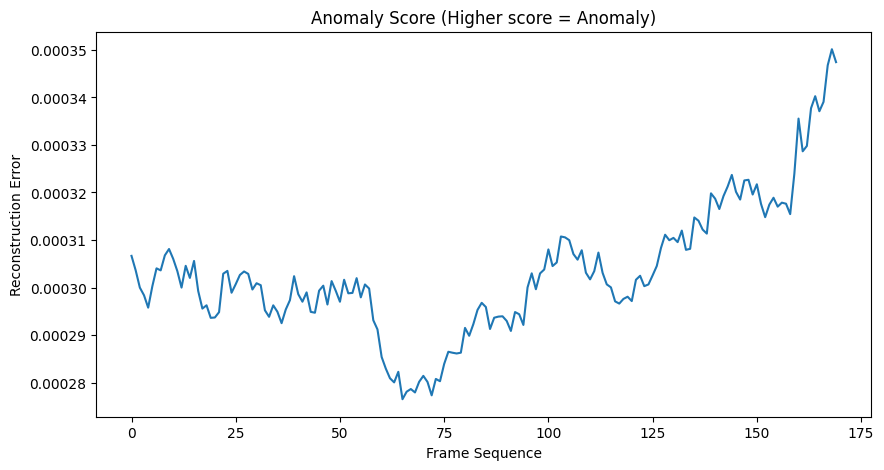

Testing complete! if  in graph there is sudden   high 'Spike'  will be visible, soo that is anomaly.


In [7]:
import matplotlib.pyplot as plt

# 1. Test data loading (using Test001 folder in which there is anomaly)
test_path = './UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test001'

def load_test_frames(directory):
    frames = []
    for img_name in sorted(os.listdir(directory)):
        if img_name.endswith('.tif'):
            img = cv2.imread(os.path.join(directory, img_name), 0)
            img = cv2.resize(img, (128, 128))
            frames.append(img)
    frames = np.array(frames).astype('float32') / 255.0

    X = []
    for i in range(len(frames) - 10):
        X.append(frames[i:i+10])
    return np.expand_dims(np.array(X), axis=-1)

test_data = load_test_frames(test_path)

# 2. Model prediction
reconstructed_frames = model.predict(test_data)

# 3. Error (Loss) calculation
# for every  sequence  error willbe shown
errors = np.mean(np.square(test_data - reconstructed_frames), axis=(1, 2, 3, 4))

# 4. Result Ploting
plt.figure(figsize=(10, 5))
plt.plot(errors)
plt.title('Anomaly Score (Higher score = Anomaly)')
plt.xlabel('Frame Sequence')
plt.ylabel('Reconstruction Error')
plt.show()

# 5. sample frame will be shown
print("Testing complete! if  in graph there is sudden   high 'Spike'  will be visible, soo that is anomaly.")

Calculated Dynamic Threshold: 0.00032
System Active: Searching for the most suspicious events...


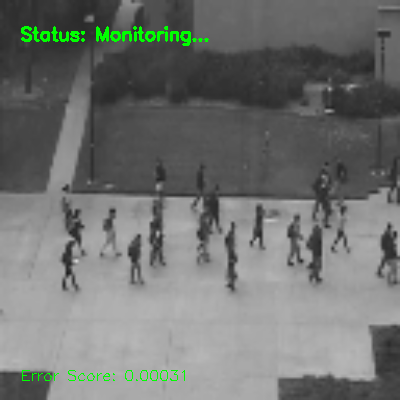

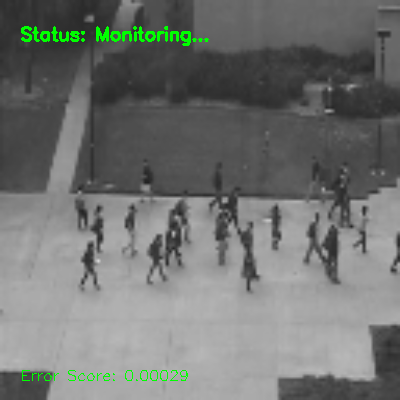

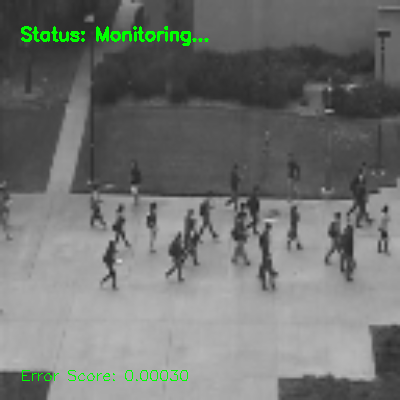

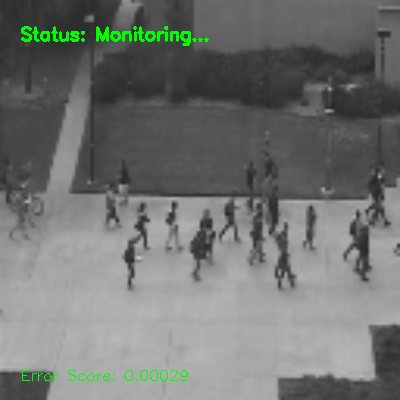

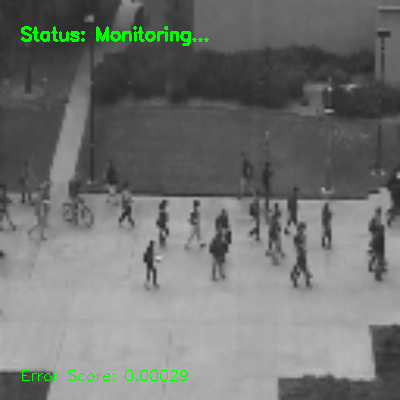

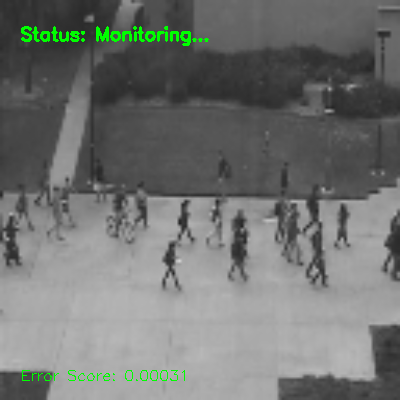

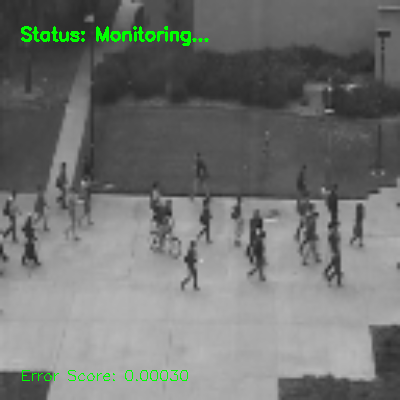

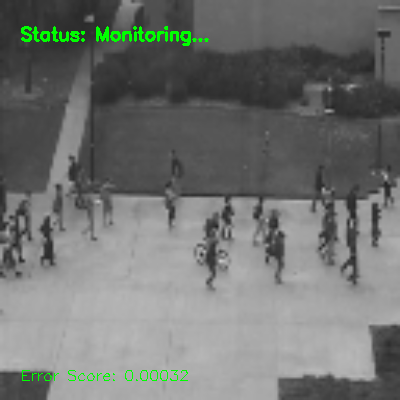

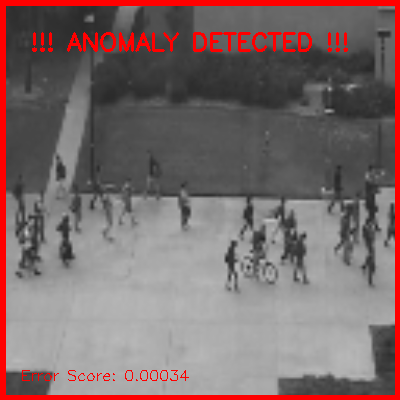

-> Alert at Frame 160 (Score: 0.00034)


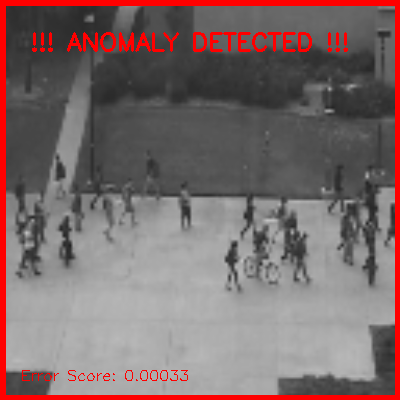

-> Alert at Frame 161 (Score: 0.00033)


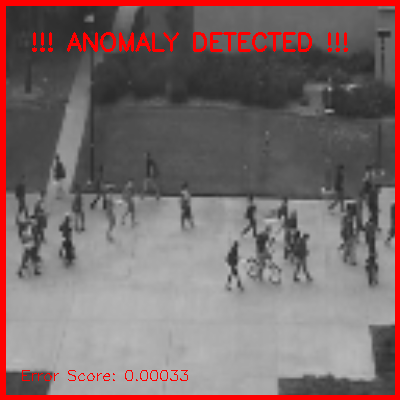

-> Alert at Frame 162 (Score: 0.00033)


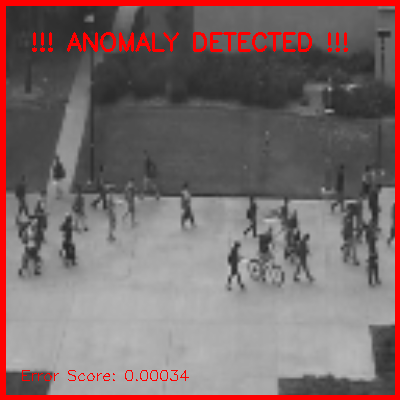

-> Alert at Frame 163 (Score: 0.00034)


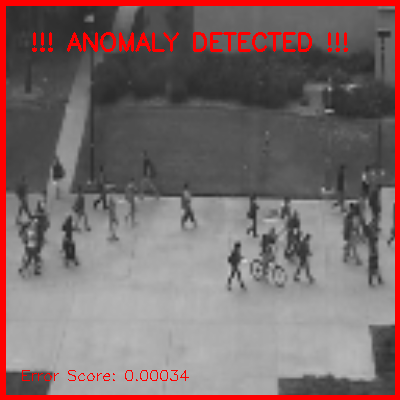

-> Alert at Frame 164 (Score: 0.00034)


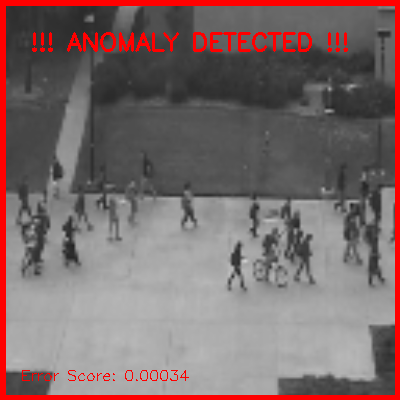

-> Alert at Frame 165 (Score: 0.00034)


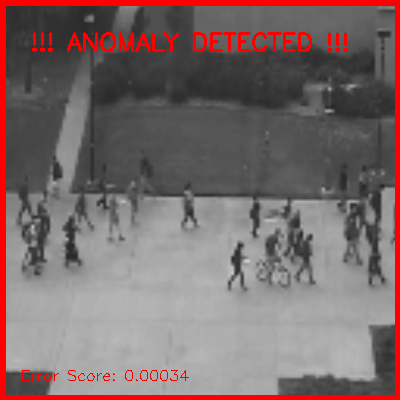

-> Alert at Frame 166 (Score: 0.00034)


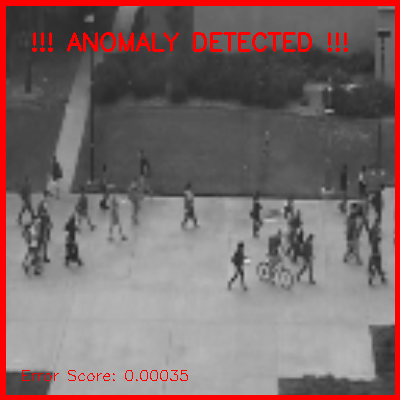

-> Alert at Frame 167 (Score: 0.00035)


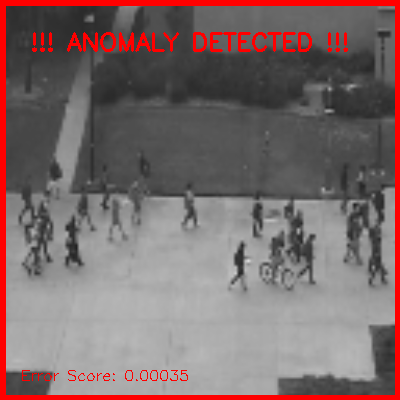

-> Alert at Frame 168 (Score: 0.00035)


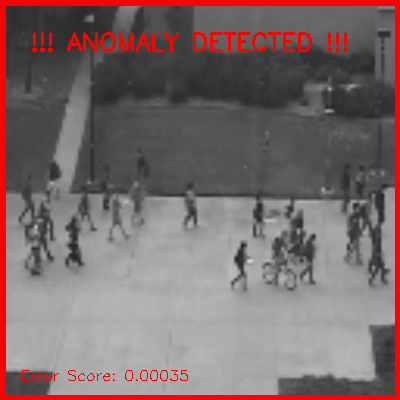

-> Alert at Frame 169 (Score: 0.00035)
Analysis Done!


In [8]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# 1. Automatic Threshold:
dynamic_threshold = np.mean(errors) + (np.std(errors) * 1.5)
print(f"Calculated Dynamic Threshold: {dynamic_threshold:.5f}")

print("System Active: Searching for the most suspicious events...")

# 2. Loop through all frames
for i in range(len(test_data)):
    # Frame preparation
    display_frame = (test_data[i][-1].reshape(128, 128) * 255).astype('uint8')
    display_frame = cv2.cvtColor(display_frame, cv2.COLOR_GRAY2BGR)
    display_frame = cv2.resize(display_frame, (400, 400))

    score = errors[i]

    # 3. Alert Logic using Dynamic Threshold
    if score > dynamic_threshold:
        # RED ALERT for highest error frames
        cv2.rectangle(display_frame, (0,0), (400,400), (0,0,255), 10)
        cv2.putText(display_frame, "!!! ANOMALY DETECTED !!!", (30, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 2)
        status_color = (0,0,255)
    else:
        # Green for lower error
        cv2.putText(display_frame, "Status: Monitoring...", (20, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)
        status_color = (0,255,0)

    # Score display
    cv2.putText(display_frame, f"Error Score: {score:.5f}", (20, 380),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, status_color, 1)

    # 4.high score +normal samples
    if score > dynamic_threshold or i % 20 == 0:
        cv2_imshow(display_frame)
        if score > dynamic_threshold:
            print(f"-> Alert at Frame {i} (Score: {score:.5f})")

print("Analysis Done!")